In [1]:
%matplotlib inline


# 1D optimal transport


This example illustrates the computation of EMD and Sinkhorn transport plans
and their visualization.




In [2]:
# Author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import get_1D_gauss as gauss

Generate data
-------------



In [3]:
#%% parameters

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
b = gauss(n, m=60, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

Plot distributions and loss matrix
----------------------------------



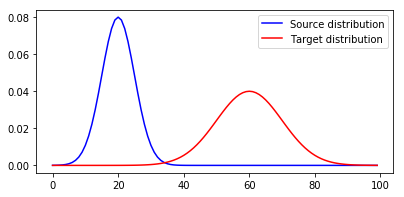

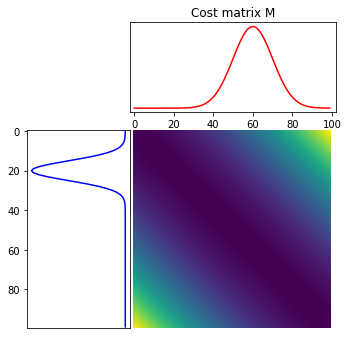

In [4]:
#%% plot the distributions

pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

#%% plot distributions and loss matrix

pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, 'Cost matrix M')

Solve EMD
---------



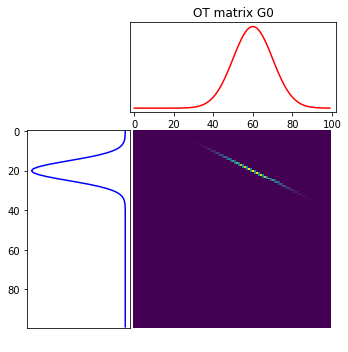

In [5]:
#%% EMD

G0 = ot.emd(a, b, M)

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G0, 'OT matrix G0')

Solve Sinkhorn
--------------



It.  |Err         
-------------------
    0|8.187970e-02|
   10|3.460174e-02|
   20|6.633335e-03|
   30|9.797798e-04|
   40|1.389606e-04|
   50|1.959016e-05|
   60|2.759079e-06|
   70|3.885166e-07|
   80|5.470605e-08|
   90|7.702918e-09|
  100|1.084609e-09|
  110|1.527180e-10|


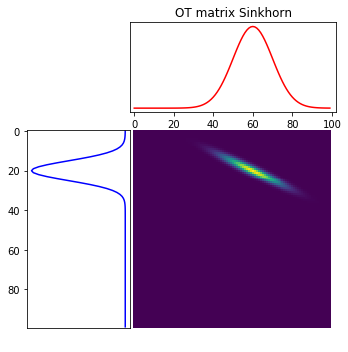

In [6]:
#%% Sinkhorn

lambd = 1e-3
Gs = ot.sinkhorn(a, b, M, lambd, verbose=True)

pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'OT matrix Sinkhorn')

pl.show()